In [4]:
# ---------------------------
# 1. Library Imports
# ---------------------------

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import plotly.express as px # For interactive plot
pd.set_option('display.max_columns', None)

In [202]:
# ---------------------------
# 2. Load the Data
# ---------------------------

# Define file path
DATA_PATH = "../data/raw/WHO_PM25_urban_2022.csv"

df = pd.read_csv(DATA_PATH)
df.head()

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,IsLatestYear,Dim1 type,Dim1,Dim1ValueCode,Dim2 type,Dim2,Dim2ValueCode,Dim3 type,Dim3,Dim3ValueCode,DataSourceDimValueCode,DataSource,FactValueNumericPrefix,FactValueNumeric,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AFR,Africa,Country,KEN,Kenya,Year,2019,True,Residence Area Type,Cities,RESIDENCEAREATYPE_CITY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.01,NaN,NaN,6.29,NaN,13.74,10.01 [6.29-13.74],NaN,NaN,EN,2022-08-12T05:00:00.000Z
1,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,TTO,Trinidad and Tobago,Year,2019,True,Residence Area Type,Rural,RESIDENCEAREATYPE_RUR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.02,NaN,NaN,7.44,NaN,12.55,10.02 [7.44-12.55],NaN,NaN,EN,2022-08-12T05:00:00.000Z
2,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,EUR,Europe,Country,GBR,United Kingdom of Great Britain and Northern I...,Year,2019,True,Residence Area Type,Cities,RESIDENCEAREATYPE_CITY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.06,NaN,NaN,9.73,NaN,10.39,10.06 [9.73-10.39],NaN,NaN,EN,2022-08-12T05:00:00.000Z
3,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,GRD,Grenada,Year,2019,True,Residence Area Type,Total,RESIDENCEAREATYPE_TOTL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.08,NaN,NaN,7.07,NaN,13.20,10.08 [7.07-13.20],NaN,NaN,EN,2022-08-12T05:00:00.000Z
4,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,BRA,Brazil,Year,2019,True,Residence Area Type,Towns,RESIDENCEAREATYPE_TOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.09,NaN,NaN,8.23,NaN,12.46,10.09 [8.23-12.46],NaN,NaN,EN,2022-08-12T05:00:00.000Z


In [203]:
# ---------------------------
# 3. Quick Data Overview
# ---------------------------

# 3.1
print(f"\nNumber of rows: {df.shape[0]}, Columns: {df.shape[1]}")
print("\nColumn Names:")
print(df.columns.tolist())


Number of rows: 9450, Columns: 34

Column Names:
['IndicatorCode', 'Indicator', 'ValueType', 'ParentLocationCode', 'ParentLocation', 'Location type', 'SpatialDimValueCode', 'Location', 'Period type', 'Period', 'IsLatestYear', 'Dim1 type', 'Dim1', 'Dim1ValueCode', 'Dim2 type', 'Dim2', 'Dim2ValueCode', 'Dim3 type', 'Dim3', 'Dim3ValueCode', 'DataSourceDimValueCode', 'DataSource', 'FactValueNumericPrefix', 'FactValueNumeric', 'FactValueUoM', 'FactValueNumericLowPrefix', 'FactValueNumericLow', 'FactValueNumericHighPrefix', 'FactValueNumericHigh', 'Value', 'FactValueTranslationID', 'FactComments', 'Language', 'DateModified']


In [204]:
# 3.2 How many countries are in the dataset?
num_countries = df['Location'].nunique()
print(f"\nNumber of Countries: {num_countries}")


Number of Countries: 195


In [205]:
# 3.3 How many cities in each country?
city_counts = df[df['Dim1'].str.contains('Cities|Urban')].groupby('Location').size()
print("\nNumber of urban records per country:\n", city_counts)


Number of urban records per country:
 Location
Afghanistan                                                 20
Albania                                                     20
Algeria                                                     20
Andorra                                                     10
Angola                                                      20
                                                            ..
Viet Nam                                                    20
Yemen                                                       20
Zambia                                                      20
Zimbabwe                                                    20
occupied Palestinian territory, including east Jerusalem    20
Length: 193, dtype: int64


In [206]:
# 3.4 What years are covered?
years_covered = df['Period'].unique()
print(f"\nYears in dataset: {sorted(years_covered)}")


Years in dataset: [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]


In [207]:
# 3.5.1 Which country has the highest average PM2.5?
pm_col = 'FactValueNumeric'
avg_pm_by_country = df.groupby('Location')[pm_col].mean().sort_values(ascending=False)
print("\nTop countries by average PM2.5:\n", avg_pm_by_country.head(5))


Top countries by average PM2.5:
 Location
Afghanistan     73.1300
Tajikistan      65.7018
Kuwait          63.2226
Qatar           60.6244
Saudi Arabia    59.3326
Name: FactValueNumeric, dtype: float64


In [208]:
# ---------------------------
# 4. Descriptive Statistics
# ---------------------------

# 4.1
print("\nDescription of Data:\n")
df.info()


Description of Data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9450 entries, 0 to 9449
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   IndicatorCode               9450 non-null   object 
 1   Indicator                   9450 non-null   object 
 2   ValueType                   9450 non-null   object 
 3   ParentLocationCode          9450 non-null   object 
 4   ParentLocation              9450 non-null   object 
 5   Location type               9450 non-null   object 
 6   SpatialDimValueCode         9450 non-null   object 
 7   Location                    9450 non-null   object 
 8   Period type                 9450 non-null   object 
 9   Period                      9450 non-null   int64  
 10  IsLatestYear                9450 non-null   bool   
 11  Dim1 type                   9450 non-null   object 
 12  Dim1                        9450 non-null   object 
 13  Dim1ValueC

In [209]:
# 4.2
df.describe()

,Period,Dim2 type,Dim2,Dim2ValueCode,Dim3 type,Dim3,Dim3ValueCode,DataSourceDimValueCode,DataSource,FactValueNumericPrefix,FactValueNumeric,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,FactValueTranslationID,FactComments
count,9450.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9450.000000,0.0,0.0,9450.000000,0.0,9450.000000,0.0,0.0
mean,2014.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.538435,NaN,NaN,16.229705,NaN,35.475423,NaN,NaN
std,2.872433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.024029,NaN,NaN,11.174679,NaN,27.150003,NaN,NaN
min,2010.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.590000,NaN,NaN,1.410000,NaN,5.260000,NaN,NaN
25%,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.920000,NaN,NaN,7.850000,NaN,15.950000,NaN,NaN
50%,2014.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.570000,NaN,NaN,13.790000,NaN,24.480000,NaN,NaN
75%,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.977500,NaN,NaN,20.340000,NaN,49.687500,NaN,NaN
max,2019.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.490000,NaN,NaN,70.240000,NaN,175.600000,NaN,NaN


In [210]:
# 4.3
print("\nMissing values per column:\n")
print(df.isnull().sum())


Missing values per column:

IndicatorCode                    0
Indicator                        0
ValueType                        0
ParentLocationCode               0
ParentLocation                   0
Location type                    0
SpatialDimValueCode              0
Location                         0
Period type                      0
Period                           0
IsLatestYear                     0
Dim1 type                        0
Dim1                             0
Dim1ValueCode                    0
Dim2 type                     9450
Dim2                          9450
Dim2ValueCode                 9450
Dim3 type                     9450
Dim3                          9450
Dim3ValueCode                 9450
DataSourceDimValueCode        9450
DataSource                    9450
FactValueNumericPrefix        9450
FactValueNumeric                 0
FactValueUoM                  9450
FactValueNumericLowPrefix     9450
FactValueNumericLow              0
FactValueNumericHighPrefix

In [211]:
# 4.4 Check for duplicated rows
print(f"\nNumber of duplicated rows: {df.duplicated().sum()}")


Number of duplicated rows: 0


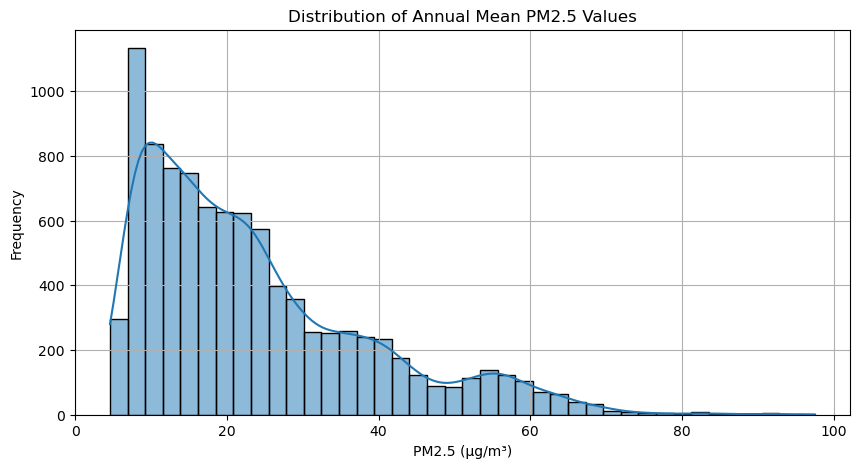

In [212]:
# ---------------------------
# 5. Visual Exploration
# ---------------------------

# 5.1 Distribution of PM2.5 values
plt.figure(figsize=(10, 5))
sns.histplot(df[pm_col], bins=40, kde=True)
plt.title("Distribution of Annual Mean PM2.5 Values")
plt.xlabel("PM2.5 (μg/m³)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

/var/folders/k_/m7hq9l850hd6f3qfdc02z2g00000gn/T/ipykernel_16983/3571130527.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




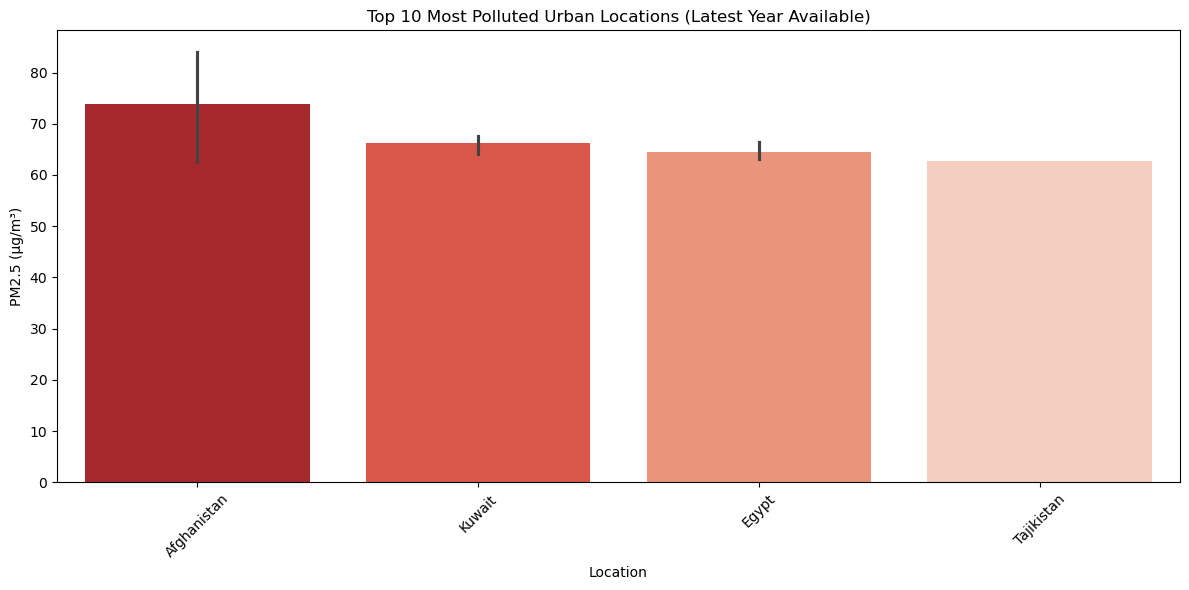

In [213]:
# 5.2.1 Top 10 most poluted locations (latest year only)
latest_year = df[df['IsLatestYear'] == 1]
top_locations = latest_year.sort_values(by=pm_col, ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_locations, x='Location', y=pm_col, palette='Reds_r')
plt.title("Top 10 Most Polluted Urban Locations (Latest Year Available)")
plt.ylabel("PM2.5 (μg/m³)")
plt.xlabel("Location")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/k_/m7hq9l850hd6f3qfdc02z2g00000gn/T/ipykernel_16983/1205751918.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




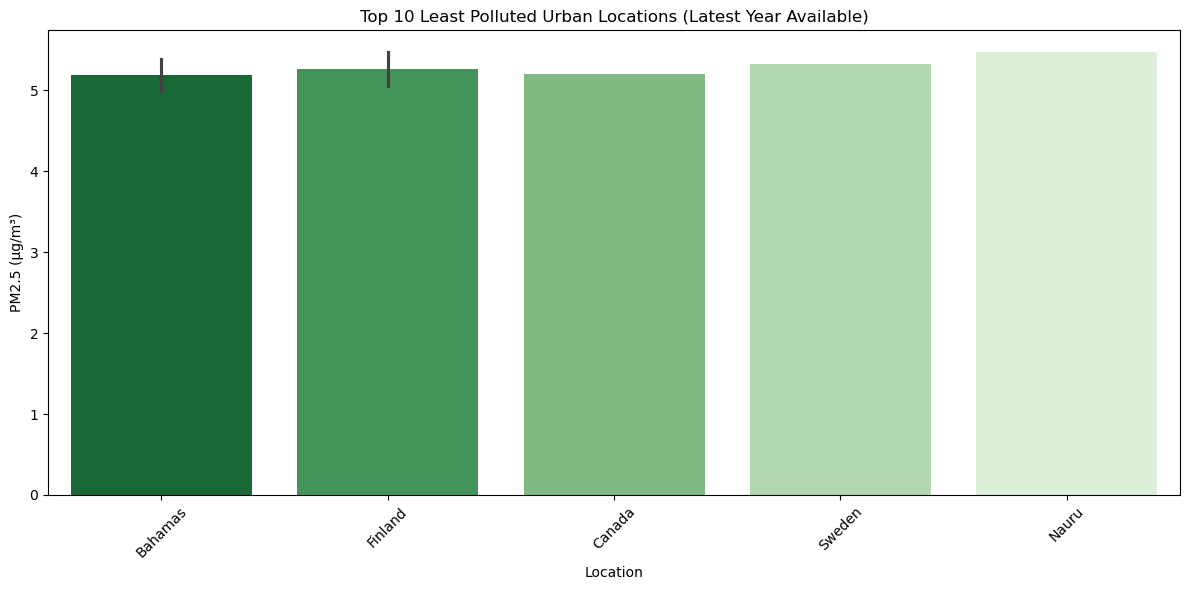

In [214]:
# 5.2.2 Top 10 least poluted locations (latest year only)
latest_year = df[df['IsLatestYear'] == 1]
top_locations = latest_year.sort_values(by=pm_col, ascending=True).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_locations, x='Location', y=pm_col, palette='Greens_r')
plt.title("Top 10 Least Polluted Urban Locations (Latest Year Available)")
plt.ylabel("PM2.5 (μg/m³)")
plt.xlabel("Location")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

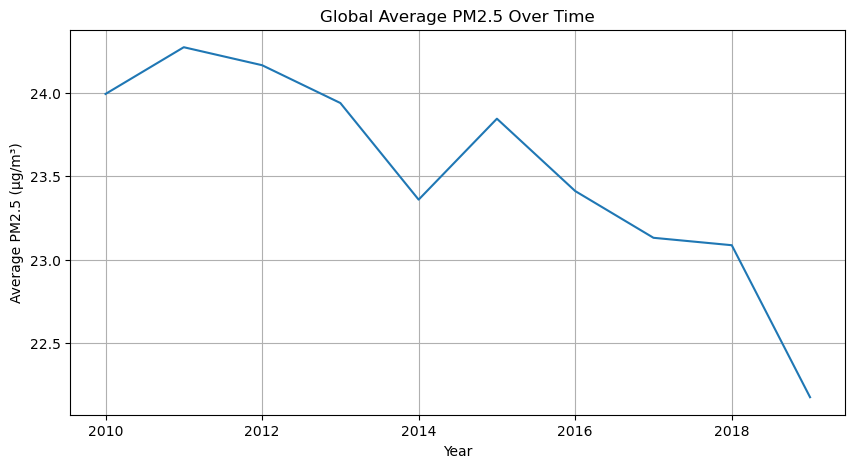

In [215]:
# 5.3 Plot average PM2.5 over time
yearly_avg = df.groupby('Period')[pm_col].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(data=yearly_avg, x='Period', y=pm_col)
plt.title("Global Average PM2.5 Over Time")
plt.xlabel("Year")
plt.ylabel("Average PM2.5 (μg/m³)")
plt.grid(True)
plt.show()

In [216]:
# 5.4 Interactive choropleth (if 'Location' is mappable to country names)
# Note: Requires cleaning or standardizing country/location names first
choropleth_df = df.groupby('Location')[pm_col].mean().reset_index()
fig = px.choropleth(
    choropleth_df,
    locations="Location",
    locationmode="country names", # Might need to adjust based on real values
    color=pm_col,
    color_continuous_scale="Turbo",
    title="Average Urban PM2.5 Concentration by Location"
)
fig.show()

In [217]:
# ---------------------------
# 6. Save Interim Version
# ---------------------------

interim_path = "../data/interim/pm25_explored.csv"
df.to_csv(interim_path, index=False)
print(f"\n Interim file sved to: {interim_path}")


 Interim file sved to: ../data/interim/pm25_explored.csv
